In [12]:
import scipy.linalg as la
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([-1, -1, -1, +1, +1])
X_p = np.array([0.3, 0.4, 0.5, 0.6, 0.7])

Y = np.array([-1, -1, -1, +1, +1, +1])
Y_p = np.array([0.3, 0.4, 0.6, 0.5, 0.7, 0.8])

Z = np.array([+1, -1, -1, +1, +1, -1])
Z_p = np.array([0.3, 0.6, 0.4, 0.5, 0.7, 0.8])

In [4]:
X_v = X*X_p
X_v.T @ X_v


1.3499999999999999

In [5]:
abs(np.amin((X*X_p)))

0.5

In [6]:
Z_p[Z_p<0.5]

array([0.3, 0.4])

In [7]:
Z_pos = Z_p[Z>0]
Z_neg = Z_p[Z<0]

In [8]:
Z_neg

array([0.6, 0.4, 0.8])

In [9]:
#X_p[X_p<abs(np.amin((X*X_p)))]
Z_pos[Z_pos<abs(np.amin((Z*Z_p)))]

array([0.3, 0.5, 0.7])

In [10]:
Z_pos = np.sort(Z_pos)

In [11]:
Z_neg = np.sort(Z_neg)

In [12]:
Z_pos - Z_neg

array([-0.1, -0.1, -0.1])

In [25]:
Z_neg

array([0.4, 0.6, 0.8])

In [26]:
Z_pos

array([0.3, 0.5, 0.7])

In [34]:
Z*Z_p

0.8

#Nope
Y_pos = Y_p[Y>0]
Y_neg = Y_p[Y<0]
Y_pos = np.sort(Y_pos)
Y_neg = np.sort(Y_neg)
mask = (Y_pos<np.amin(Y_neg)) | (Y_pos>np.amax(Y_neg))
Y_unique = Y_pos[mask]
mask = (Y_neg<np.amin(Y_pos)) | (Y_neg>np.amax(Y_pos))
Y_unique = np.append(Y_unique, Y_neg[mask])
Y_unique.size/Y.size

In [39]:
mask = (Z_pos<np.amin(Z_neg)) | (Z_pos>np.amax(Z_neg))
Z_unique = Z_pos[mask]

In [40]:
mask = (Z_neg<np.amin(Z_pos)) | (Z_neg>np.amax(Z_pos))
Z_unique = np.append(Z_unique, Z_neg[mask])

In [44]:
Z_unique.size/Z.size

0.3333333333333333

From here new

In [201]:
A = np.array([-1, -1, -1, +1, +1, +1])
A_p = np.array([0.3, 0.4, 0.6, 0.5, 0.7, 0.8])

In [221]:
#Calculate thresholds to be tested
thresh = np.arange(0.0, 1.01, 0.04)

#define arrays for calculation
A_labels = np.array([A]*thresh.size)
A_vals = np.array([A_p]*thresh.size)
#decisionMat combines the obtained values with the threshold and labels (negative numbers are now falsely classified)
decisionMat = (A_vals.T-thresh).T
decisionMat = decisionMat * A_labels
#correct: which points were correctly classified?
correct = np.where(test<0, 0, 1)
#Calculate true/false positives per threshold
TPMask = (A==-1) & (correct==1)
TP = np.where(TPMask, 1.0, .0)
FPMask = (A==1) & (correct==0)
FP = np.where(FPMask, 1.0, 0)
TP = np.sum(TP, axis=1)
FP = np.sum(FP, axis=1)
TP_norm = TP/np.max(TP)
FP_norm = FP/np.max(FP)
#Calculate the AUC
ROC_AUC = np.trapz(TP_norm, FP_norm)

0.0

<function matplotlib.pyplot.show(*args, **kw)>

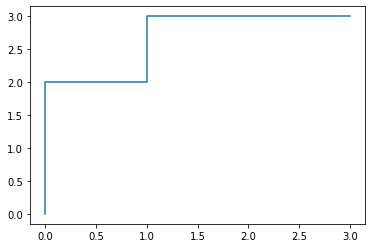

In [217]:
plt.plot(FP, TP)
plt.show